In [24]:
import geopandas as gpd
import os
import pandas as pd
import plotly.express as px
import ujson as json
import numpy as np
import matplotlib.pyplot as plt

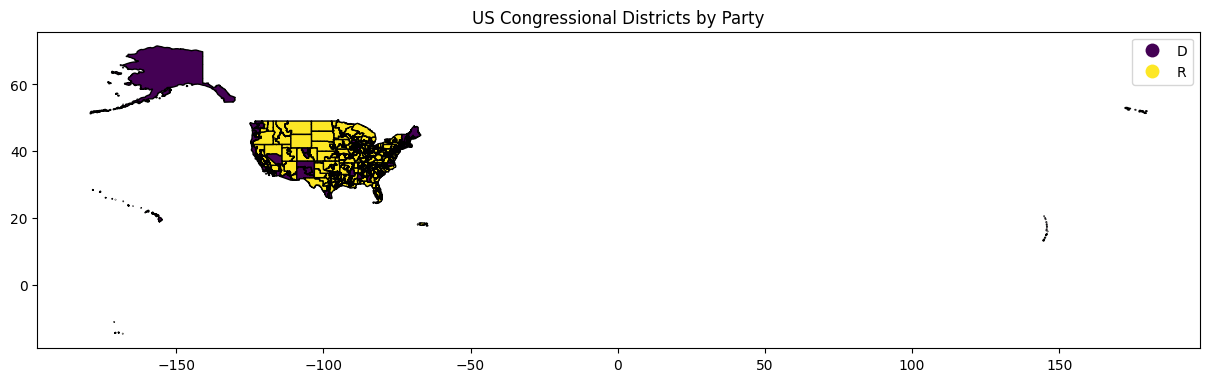

In [28]:
# # Read in the GeoJSON file
# gdf = gpd.read_file("../data/Congressional_Districts.geojson")

# fig, ax = plt.subplots(figsize=(15, 10))
# gdf.plot(column='PARTY', ax=ax, legend=True, cmap="viridis", edgecolor="k")
# ax.set_title("US Congressional Districts by Party")
# plt.show()


In [ ]:
# Load the GeoJSON as a GeoDataFrame
gdf = gpd.read_file("../data/Congressional_Districts.geojson")

# Convert all Timestamp objects to strings
gdf = gdf.applymap(lambda x: str(x) if isinstance(x, pd.Timestamp) else x)

# Convert the GeoDataFrame to JSON
geojson = json.loads(gdf.to_json())

# Plot using Plotly
fig = px.choropleth_mapbox(gdf, 
                           geojson=geojson, 
                           locations=gdf.index, 
                           color='PARTY',
                           mapbox_style="carto-positron", 
                           hover_name='NAMELSAD20',
                           hover_data=['FIRSTNAME', 'LASTNAME', 'WEBSITEURL', 'PHONE'],
                           center={"lat": 37.0902, "lon": -95.7129}, 
                           zoom=3,
                           opacity=0.5,
                           labels={'PARTY':'Party'})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [37]:
# Load the GeoJSON as a GeoDataFrame
gdf = gpd.read_file("../data/Congressional_Districts.geojson")

df_election = pd.read_csv('../data/fips_df.csv')

merged_gdf = gdf.merge(df_election, left_on=['STATEFP20', 'DISTRICT'], right_on=['STATEFP20', 'District'])


geojson = json.loads(merged_gdf.to_json())

print(gdf.columns)
print(df_election.columns)

# Plot using Plotly
# fig = px.choropleth_mapbox(merged_gdf, 
#                            geojson=geojson, 
#                            locations=merged_gdf.index, 
#                            color='Vote Percentage',
#                            mapbox_style="carto-positron", 
#                            hover_name='Name',
#                            hover_data=['Party', 'Raised', 'Spent'],
#                            center={"lat": 37.0902, "lon": -95.7129}, 
#                            zoom=3,
#                            opacity=0.5,
#                            labels={'Vote Percentage':'Vote Percentage'})

# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

Index(['OBJECTID', 'STATEFP20', 'GEOID20', 'CD118FP', 'NAMELSAD20', 'LSAD20',
       'CDSESSN', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20',
       'INTPTLON20', 'OFFICE_ID', 'BIOGUIDE_ID', 'OFFICE_AUDIT_ID', 'PREFIX',
       'FIRSTNAME', 'MIDDLENAME', 'LASTNAME', 'SUFFIX', 'LISTING_NAME',
       'PHONE', 'WEBSITEURL', 'VACANT', 'CONTACTFORMURL', 'PHOTOURL',
       'FACE_BOOK_URL', 'TWITTER_URL', 'YOUTUBE_URL', 'INSTAGRAM_URL',
       'FLICKR_URL', 'PARTY', 'DISTRICT', 'STATE', 'VACANCY', 'ROOM_NUM',
       'HOB', 'COMMITTEE_ASSIGNMENTS', 'LAST_UPDATED', 'SHAPE_Length',
       'SHAPE_Area', 'geometry'],
      dtype='object')
Index(['Unnamed: 0', 'State', 'District', 'Name', 'Party', 'Incumbent',
       'Winner', 'Vote Percentage', 'Raised', 'Spent',
       'Total_Spent_Per_District', 'Percent_Spent', 'STATEFP20'],
      dtype='object')
